<a href="https://colab.research.google.com/github/RufusJoel12/Diabetic_retinopathy_detection/blob/main/Diabetic_retinopathy_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip uninstall tensorflow

Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0


In [ ]:
pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 38kB/s 
     |████████████████████████████████| 512kB 41.8MB/s 
     |████████████████████████████████| 3.8MB 41.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=b7924c91daee1cd0b16348d174e58850c024de1eb9146366098e0a4ec1fd26ba
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2


In [ ]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
from skimage.io import imread
import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
base_image_dir = '/content/drive/My Drive/DR'
retina_df = pd.read_csv(os.path.join(base_image_dir,'trainLabels_cropped.csv'))
retina_df['Patient_ID'] = retina_df['image'].map(lambda x: x.split('_')[0])
retina_df['path'] = retina_df['image'].map(lambda x: os.path.join(base_image_dir,'{}.jpeg'.format(x)))

retina_df['exists'] = retina_df['path'].map(os.path.exists)
print(retina_df['exists'].sum(),'images found of',retina_df.shape[0],'total')
retina_df['eye'] = retina_df['image'].map(lambda x: 1 if x.split('_')[-1]=='left' else 0)
from keras.utils.np_utils import  to_categorical
retina_df['level_cat'] = retina_df['level'].map(lambda x: to_categorical(x,1+retina_df['level'].max()))

retina_df.dropna(inplace = True)
retina_df = retina_df[retina_df['exists']]
retina_df.sample(10)

4000 images found of 35108 total


Using TensorFlow backend.


,Unnamed: 0,Unnamed: 0.1,image,level,Patient_ID,path,exists,eye,level_cat
3879,3879,3883,4864_right,1,4864,/content/drive/My Drive/DR/4864_right.jpeg,True,0,"[0.0, 1.0, 0.0, 0.0, 0.0]"
832,832,833,1017_right,0,1017,/content/drive/My Drive/DR/1017_right.jpeg,True,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
23923,23923,23937,30226_right,3,30226,/content/drive/My Drive/DR/30226_right.jpeg,True,0,"[0.0, 0.0, 0.0, 1.0, 0.0]"
7852,7852,7858,9863_left,4,9863,/content/drive/My Drive/DR/9863_left.jpeg,True,1,"[0.0, 0.0, 0.0, 0.0, 1.0]"
1228,1228,1229,1509_right,2,1509,/content/drive/My Drive/DR/1509_right.jpeg,True,0,"[0.0, 0.0, 1.0, 0.0, 0.0]"
6601,6601,6605,8302_right,3,8302,/content/drive/My Drive/DR/8302_right.jpeg,True,0,"[0.0, 0.0, 0.0, 1.0, 0.0]"
892,892,893,1075_right,0,1075,/content/drive/My Drive/DR/1075_right.jpeg,True,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
26277,26277,26292,33283_left,4,33283,/content/drive/My Drive/DR/33283_left.jpeg,True,1,"[0.0, 0.0, 0.0, 0.0, 1.0]"
5915,5915,5919,7463_right,1,7463,/content/drive/My Drive/DR/7463_right.jpeg,True,0,"[0.0, 1.0, 0.0, 0.0, 0.0]"
3737,3737,3741,4695_right,2,4695,/content/drive/My Drive/DR/4695_right.jpeg,True,0,"[0.0, 0.0, 1.0, 0.0, 0.0]"


train 2097 validation 2093


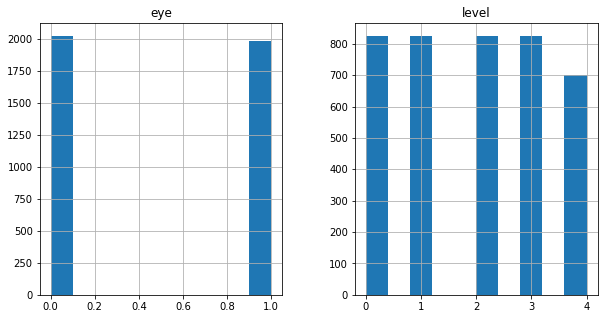

In [ ]:
retina_df[['level','eye']].hist(figsize = (10,5))

from sklearn.model_selection import train_test_split
rr_df = retina_df[['Patient_ID','level']].drop_duplicates()
train_ids, valid_ids = train_test_split(rr_df['Patient_ID'],
                                         test_size = 0.50,
                                         random_state = 2018,
                                         stratify = rr_df['level'])
raw_train_df = retina_df[retina_df['Patient_ID'].isin(train_ids)]
valid_df = retina_df[retina_df['Patient_ID'].isin(valid_ids)]
print('train',raw_train_df.shape[0], 'validation', valid_df.shape[0])


New data Size:  750 Old size:  2097


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab54c0ce80>,
      dtype=object)

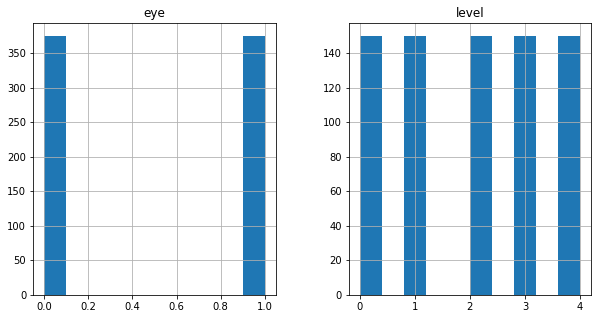

In [ ]:
train_df = raw_train_df.groupby(['level','eye']).apply(lambda x: x.sample(75, replace = True)).reset_index(drop = True)
print('New data Size: ',train_df.shape[0],'Old size: ', raw_train_df.shape[0])
train_df[['level','eye']].hist(figsize=(10,5))


In [ ]:
import tensorflow as tf
from keras import backend as K
from keras.applications.inception_v3 import preprocess_input
import numpy as np
img_size = (512,512)

def tf_image_loader(out_size , horizontal_flip = True,
                   vertical_flip = False, random_brightness = True,
                   random_contrast = True, random_saturation = True,
                   random_hue = True, color_mode = 'rgb',
                   preproc_func = preprocess_input,
                   on_batch = False):
    def _func(X):
        with tf.name_scope('image_augmentation'):
            with tf.name_scope('input'):
                X = tf.image.decode_png(tf.io.read_file(X),channels = 3 if color_mode=='rgb' else 0)
                X = tf.image.resize(X, out_size)
            with tf.name_scope('augmentation'):
                if horizontal_flip:
                    X = tf.image.random_flip_left_right(X)
                if vertical_flip:
                    X = tf.image.random_flip_up_down(X)
                if random_brightness:
                    X = tf.image.random_brightness(X, max_delta = 0.1)
                if random_saturation:
                    X= tf.image.random_saturation(X, lower = 0.75, upper = 1.5)
                if random_hue:
                    X = tf.image.random_hue(X, max_delta = 0.15)
                if random_contrast:
                    X = tf.image.random_contrast(X, lower = 0.75, upper = 1.5)
                return preproc_func(X)
    if on_batch:
        def _batch_func(X,y):
            return tf.map_fn(_func, X), y
        return _batch_func
    else:
        def _all_func(X,y):
            return _func(X), y
        return _all_func
    
def tf_augmentor(out_size,
                intermediate_size = (640,640),
                intermediate_trans = 'crop',
                batch_size = 16,
                horizontal_flip = True,
                vertical_flip = False,
                random_brightness = True,
                random_contrast = True,
                random_saturation = True,
                random_hue = True,
                color_mode = 'rgb',
                preproc_func = preprocess_input,
                min_crop_percent = 0.001,
                max_crop_percent = 0.005,
                crop_probability = 0.5,
                rotation_range = 10):
    load_ops = tf_image_loader(out_size = intermediate_size,
                              horizontal_flip = horizontal_flip,
                              vertical_flip = vertical_flip,
                              random_brightness = random_brightness,
                              random_contrast = random_contrast,
                              random_saturation = random_saturation,
                              random_hue = random_hue,
                              color_mode = color_mode,
                              preproc_func = preproc_func,
                              on_batch =False)
    def batch_ops(X,y):
        batch_size = tf.shape(X)[0]
        with tf.name_scope('transformation'):
            transforms = []
            identity = tf.constant([1,0,0,0,1,0,0,0], dtype = tf.float32)
            if rotation_range > 0:
                angle_rad = rotation_range/180*np.pi
                angles = tf.random_uniform([batch_size], -angle_rad, angle_rad)
                transforms += [tf.contrib.image.angles_to_projective_transforms(angles,intermediate_size[0], intermediate_size[1])]
            
            if crop_probability > 0:
                crop_pct = tf.random_uniform([batch_size], min_crop_percent, max_crop_percent)
                left = tf.random_uniform([batch_size],0, intermediate_size[0]*(1.0 - crop_pct))
                top = tf.random_unifrom([batch_size],0, intermediate_size[1]*(1.0 - crop_pct))
                crop_transform = tf.stacks([
                    crop_pct,
                    tf.zeroes([batch_size]), top,
                    tf.zeroes([batch_size]), crop_pct, left,
                    tf.zeroes([batch_size]),
                    tf.zeroes([batch_size])
                ],1)
                
                coin = tf.less(tf.random_uniform([batch_size],0,1.0), crop_probability)
                transforms += [tf.where(coin, crop_transform, tf.tile(tf.expand_dims(identity,0),[batch_size,1]))]
            
            if len(transforms)>0:
                X = tf.contrib.image.transform(X,
                                              tf.contrib.image.compose_transforms(*transforms),
                                              interpolation = 'BILINEAR')
            if intermediate_trans == 'scale':
                X = tf.image.resize_images(X, out_size)
            elif intermediate_trans == 'crop':
                X = tf.image.resize_with_crop_or_pad(X,out_size[0], out_size[1])
            else:
                raise ValueError('Invalid Operation {}'.format(intermediate_trans))
            return X,y
    def _create_pipeline(in_ds):
        batch_ds = in_ds.map(load_ops, num_parallel_calls = 4).batch(batch_size)
        return batch_ds.map(batch_ops)
    return _create_pipeline

In [ ]:
def flow_from_dataframe(idg,
                       in_df,
                       path_col,
                       y_col,
                       shuffle = True,
                       color_mode = 'rgb'):
    files_ds = tf.data.Dataset.from_tensor_slices((in_df[path_col].values,
                                                  np.stack(in_df[y_col].values,0)))
    in_len = in_df[path_col].values.shape[0]
    while True:
        if shuffle:
            files_ds = files_ds.shuffle(in_len)
        
        next_batch = idg(files_ds).repeat().make_one_shot_iterator().get_next()
        for i in range(max(in_len//32,1)):
            yield K.get_session().run(next_batch)

In [ ]:
batch_size = 48
core_idg = tf_augmentor(out_size = img_size,
                       color_mode = 'rgb',
                       vertical_flip = True,
                       crop_probability = 0.0,
                       batch_size = batch_size)
valid_idg = tf_augmentor(out_size = img_size, color_mode = 'rgb',
                        crop_probability = 0.0,
                        horizontal_flip = False,
                        vertical_flip = False,
                        random_brightness = False,
                        random_contrast = False,
                        random_saturation = False,
                        random_hue = False,
                        rotation_range = 0,
                        batch_size = batch_size)

train_gen = flow_from_dataframe(core_idg, train_df,
                               path_col = 'path',
                               y_col = 'level_cat')
valid_gen = flow_from_dataframe(valid_idg, valid_df,
                               path_col = 'path',
                               y_col = 'level_cat')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


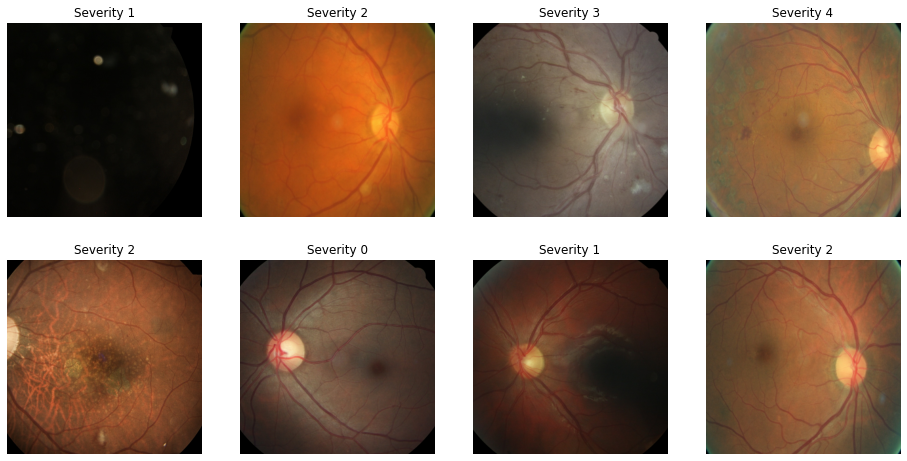

In [ ]:
t_x, t_y = next(valid_gen)
fig, m_axs = plt.subplots(2,4,figsize = (16,8))
for (c_x,c_y,c_ax) in zip(t_x,t_y, m_axs.flatten()):
    c_ax.imshow(np.clip(c_x*127+127, 0 , 255).astype(np.uint8))
    c_ax.set_title('Severity {}'.format(np.argmax(c_y, -1)))
    c_ax.axis('off')

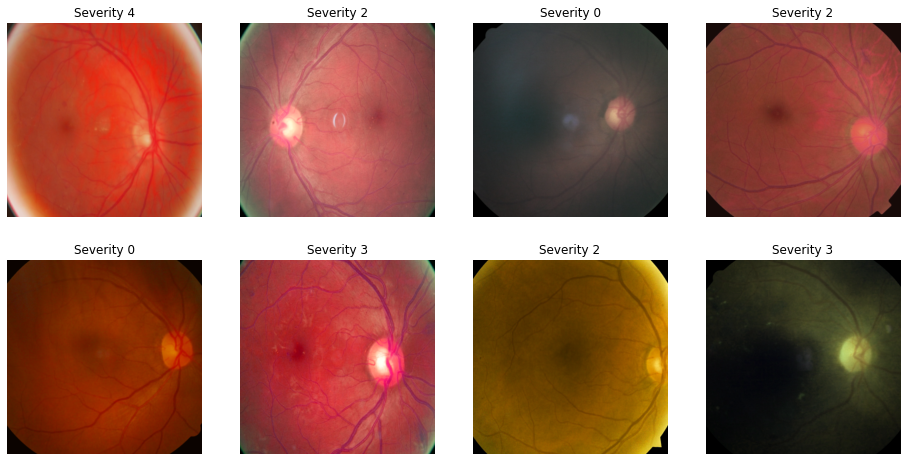

In [ ]:
t_x,t_y = next(train_gen)
fig, m_axs = plt.subplots(2,4, figsize = (16, 8))
for (c_x,c_y,c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(np.clip(c_x*127+127,0,255).astype(np.uint8))
    c_ax.set_title('Severity {}'.format(np.argmax(c_y, -1)))
    c_ax.axis('off')

In [ ]:
from keras.applications.vgg16 import VGG16 as PTModel
from keras.applications.inception_resnet_v2 import InceptionResNetV2 as PTModel
from keras.applications.inception_v3 import InceptionV3 as PTModel
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda
from keras.models import Model

in_lay = Input(t_x.shape[1:])
base_pretrained_model = PTModel( input_shape = t_x.shape[1:], include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False
pt_depth = base_pretrained_model.get_output_shape_at(0)[-1]
pt_features = base_pretrained_model(in_lay)
from keras.layers import BatchNormalization
bn_features = BatchNormalization()(pt_features)

attn_layer = Conv2D(64, kernel_size = (1,1), padding = 'same', activation = 'relu')(Dropout(0.5)(bn_features))
attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
attn_layer = Conv2D(8, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
attn_layer = Conv2D(1,
                   kernel_size = (1,1),
                   padding = 'valid',
                   activation = 'sigmoid')(attn_layer)
up_c2_w = np.ones((1,1,1, pt_depth))
up_c2 = Conv2D(pt_depth, kernel_size = (1,1), padding = 'same',
              activation = 'linear', use_bias = False, weights = [up_c2_w])
up_c2.trainable = False
attn_layer = up_c2(attn_layer)

mask_features = multiply([attn_layer, bn_features])
gap_features = GlobalAveragePooling2D()(mask_features)
gap_mask = GlobalAveragePooling2D()(attn_layer)

gap = Lambda(lambda x: x[0]/x[1], name= 'RescaleGAP')([gap_features,gap_mask])
gap_dr = Dropout(0.25)(gap)
dr_steps = Dropout(0.25)(Dense(128, activation = 'relu')(gap_dr))
out_layer = Dense(t_y.shape[-1], activation = 'softmax')(dr_steps)
retina_model = Model(inputs = [in_lay], outputs = [out_layer])
from keras.metrics import  top_k_categorical_accuracy
def top_2_accuracy(in_get, in_pred ):
    return top_k_categorical_accuracy(in_get, in_pred, k=2)
retina_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                    metrics = ['categorical_accuracy',top_2_accuracy])
retina_model.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


87916544/87910968 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
inception_v3 (Model)            (None, 14, 14, 2048) 21802784    input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 14, 14, 2048) 8192        inception_v3[1][0]               
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 14, 

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path = "{}_weights5.best.hdf5".format('retina')

checkpoint = ModelCheckpoint(weight_path, monitor = 'val_loss', verbose = 1,
                            save_best_only = True, mode = 'min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.8, patience = 2, verbose = 1, mode = 'auto', epsilon = 0.0001,
                                  cooldown = 5)

early = EarlyStopping(monitor = "val_loss",
                     mode = "min",
                     patience = 6)
callbacks_list = [checkpoint, early, reduceLROnPlat]


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [ ]:
retina_model.fit_generator(train_gen,
                          steps_per_epoch = train_df.shape[0] // batch_size,
                          validation_data = valid_gen,
                          validation_steps = valid_df.shape[0] // batch_size,
                          epochs = 8,
                          callbacks = callbacks_list,                          
                           workers = 0,
                          use_multiprocessing = False,
                          max_queue_size = 0)


Epoch 1/8
15/15 [==============================] - 2777s 185s/step - loss: 1.6150 - categorical_accuracy: 0.2849 - top_2_accuracy: 0.5114 - val_loss: 1.7692 - val_categorical_accuracy: 0.2230 - val_top_2_accuracy: 0.4572

Epoch 00001: val_loss improved from inf to 1.76917, saving model to retina_weights5.best.hdf5
Epoch 2/8
15/15 [==============================] - 2710s 181s/step - loss: 1.4102 - categorical_accuracy: 0.4014 - top_2_accuracy: 0.6278 - val_loss: 1.9641 - val_categorical_accuracy: 0.2418 - val_top_2_accuracy: 0.4322

Epoch 00002: val_loss did not improve from 1.76917
Epoch 3/8
15/15 [==============================] - 2651s 177s/step - loss: 1.3482 - categorical_accuracy: 0.4174 - top_2_accuracy: 0.6709 - val_loss: 1.6848 - val_categorical_accuracy: 0.2778 - val_top_2_accuracy: 0.4689

Epoch 00003: val_loss improved from 1.76917 to 1.68477, saving model to retina_weights5.best.hdf5
Epoch 4/8
 5/15 [=========>....................] - ETA: 7:45 - loss: 1.2996 - categorical_

In [ ]:

retina_model.load_weights(weight_path)
retina_model.save('full_retina_model3.h5')

In [ ]:
from tqdm import tqdm_notebook
valid_gen = flow_from_dataframe(valid_idg,
                                valid_df,
                                path_col = 'path',
                                y_col = 'level_cat')

vbatch_count = (valid_df.shape[0]//batch_size-1)
out_size = vbatch_count*batch_size
test_X = np.zeros((out_size,)+t_x.shape[1:], dtype = np.float32)
test_Y = np.zeros((out_size,)+t_y.shape[1:], dtype = np.float32)
for i, (c_x,c_y) in zip(tqdm_notebook(range(vbatch_count)), valid_gen):
  j = i*batch_size
  test_X[j:(j+c_x.shape[0])] = c_x
  test_Y[j:(j+c_x.shape[0])] = c_y

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
for attn_layer in retina_model.layers:
  c_shape = attn_layer.get_output_shape_at(0)
  if len(c_shape)==4:
    if c_shape[-1]==1:
      print(attn_layer)
      break

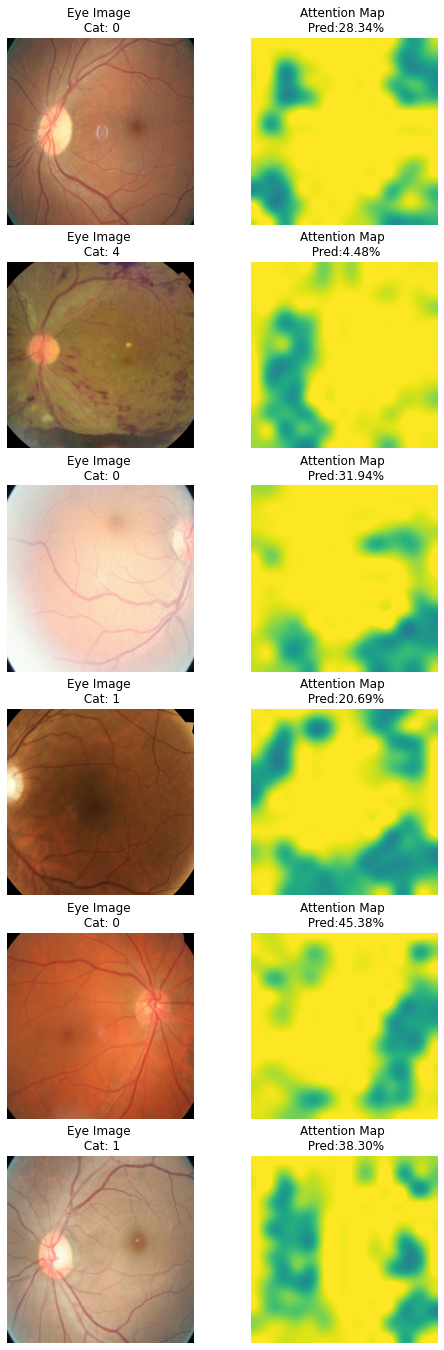

In [ ]:
import keras.backend as K
rand_idx = np.random.choice(range(len(test_X)),size = 6)
attn_func = K.function(inputs = [retina_model.get_input_at(0), K.learning_phase()],
                       outputs = [attn_layer.get_output_at(0)])
fig, m_axs = plt.subplots(len(rand_idx),2,figsize = (8,4*len(rand_idx)))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
for c_idx, (img_ax, attn_ax) in zip(rand_idx, m_axs):
  cur_img = test_X[c_idx:(c_idx+1)]
  attn_img = attn_func([cur_img,0])[0]
  img_ax.imshow(np.clip(cur_img[0,:,:,:]*127+127,0,255).astype(np.uint8))
  attn_ax.imshow(attn_img[0,:,:,0]/attn_img[0,:,:,0].max(),cmap = 'viridis',
                 vmin =0, vmax = 1,
                 interpolation = 'lanczos')
  real_cat = np.argmax(test_Y[c_idx,:])
  img_ax.set_title('Eye Image \n Cat:%2d'%(real_cat))
  pred_cat = retina_model.predict(cur_img)
  attn_ax.set_title('Attention Map \n Pred:%2.2f%%'%(100*pred_cat[0,real_cat]))
fig.savefig('attentionmap.png', dpi = 300)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
pred_Y = retina_model.predict(test_X,batch_size = 32, verbose = True)
pred_Y_cat = np.argmax(pred_Y,-1)
test_Y_cat = np.argmax(test_Y,-1)
print('Accuracy on test data: %2.2f%%'%(accuracy_score(test_Y_cat,pred_Y_cat)))
print(classification_report(test_Y_cat,pred_Y_cat))  


1008/1008 [==============================] - 975s 967ms/step
Accuracy on test data: 0.30%
              precision    recall  f1-score   support

           0       0.31      0.42      0.36       196
           1       0.34      0.39      0.36       212
           2       0.21      0.39      0.27       203
           3       0.44      0.18      0.25       207
           4       0.59      0.13      0.21       190

    accuracy                           0.30      1008
   macro avg       0.38      0.30      0.29      1008
weighted avg       0.38      0.30      0.29      1008



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


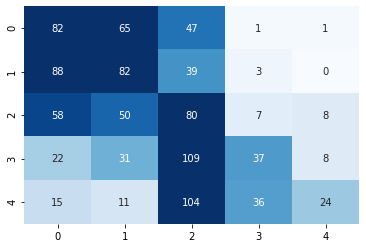

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_Y_cat, pred_Y_cat),
             annot=True, fmt = "d", cbar = False, cmap = plt.cm.Blues, vmax = test_X.shape[0]//16 )